<a href="https://colab.research.google.com/github/whataLIN/MachineLearning/blob/main/ch07_ML_01_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀

보험료 예측하기

In [2]:
#필요한 라이브러리 불러오기
import pandas as pd
from google.colab import files

In [ ]:
# https://www.kaggle.com/
# 1. 직접적으로 파일 경로
# 2. 외부의 링크를 전달 받아서
files.upload()


In [121]:
df = pd.read_csv('insurance.csv')

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
# df을 불러오면 4개를 해봐야합니다
# df.head, df.tail, df.info, df.describe
df.head()
# age : 나이, sex: 성별, bmi, children: 자녀수, region: 지역, (관측값, 독립변수)
# 보험료 -> expenses : 종속변수, 목표변수(타겟변수), 예측값

'''
1. 관측값 -> 예측값(정답값)
2. 독립변수 -> 종속변수
'''

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [7]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe() # 연속형 변수에 대한 통계치

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [13]:
# 소수점 2자리 표시
pd.options.display.float_format = "{:.2f}".format

In [14]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,expenses
count,1338.00,1338,1338.00,1338.00,1338,1338,1338.00
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.21,NaN,30.67,1.09,NaN,NaN,13270.42
std,14.05,NaN,6.10,1.21,NaN,NaN,12110.01
min,18.00,NaN,16.00,0.00,NaN,NaN,1121.87
25%,27.00,NaN,26.30,0.00,NaN,NaN,4740.29
50%,39.00,NaN,30.40,1.00,NaN,NaN,9382.03
75%,51.00,NaN,34.70,2.00,NaN,NaN,16639.92


In [120]:
# df.describe(include="object")
df.describe(include="O")

,smoker
count,1338
unique,2
top,no
freq,1064


#개인학습 문제

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

<Axes: xlabel='age', ylabel='Count'>

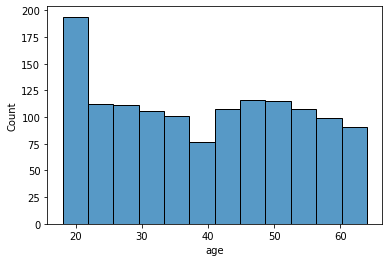

In [37]:
# 1.연령별 히스토그램

sns.histplot(data=df, x='age')

ValueError: ignored

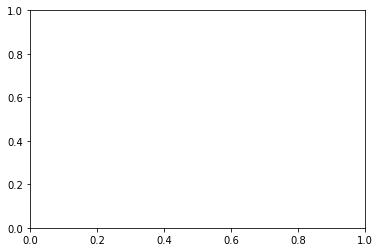

In [36]:
# 1.연령별

age_count=pd.DataFrame(df[["age"]].copy().value_counts(), columns=["count"])
plt.bar(
    range(80),
    age_count['count'])

<Axes: xlabel='expenses', ylabel='Count'>

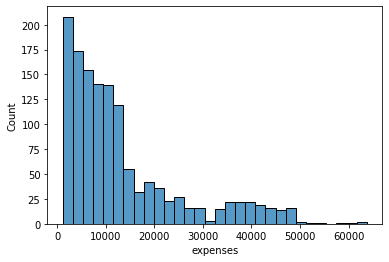

In [38]:
# 2. 보험료

sns.histplot(data=df, x='expenses')

In [35]:
expenses_count=pd.DataFrame(df[["expenses"]].copy().value_counts(), columns=["count"])
expenses_count

,count
expenses,
1639.56,2
12741.17,1
12949.16,1
12928.79,1
12925.89,1
...,...
6272.48,1
6250.44,1
6238.30,1


<Axes: xlabel='sex', ylabel='expenses'>

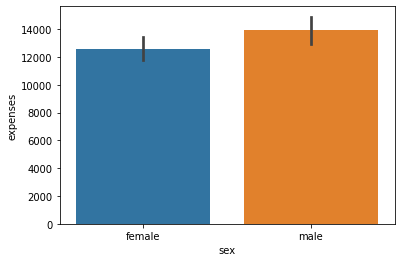

In [40]:
# 3.보험료 바플롯

sns.barplot(data=df, x='sex', y='expenses')

## 데이터 전처리 - pre-processing
* 데이터를 모델링할 수 있게 다듬는 과정
1. 하지 않으면 모델링 자체가 안되는 전처리
1. 모델의 성능을 높이기 위한 전처리

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   smoker            1338 non-null   object 
 4   expenses          1338 non-null   float64
 5   sex_male          1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), object(1), uint8(4)
memory usage: 57.6+ KB


In [122]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

In [43]:
# 모델을 통해서 학습을 시켜주려면 X(독립변수들)에 있는 값들이 모두 숫자형태여야함

# object로 표현되어 있는 범주형 변수들이 버그를 일으킴

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# 독립변수들(X) => 2개 이상의 열을 가진 df
X = df.drop('expenses', axis=1)

# 종속변수(y) => 1개
y=df['expenses']

model.fit(X,y)      #X를 통해 y를 예측하는 훈련

ValueError: ignored

#범주형 데이터 처리

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   int64  
 3   smoker            1338 non-null   object 
 4   expenses          1338 non-null   float64
 5   sex_male          1338 non-null   uint8  
 6   region_northwest  1338 non-null   uint8  
 7   region_southeast  1338 non-null   uint8  
 8   region_southwest  1338 non-null   uint8  
dtypes: float64(2), int64(2), object(1), uint8(4)
memory usage: 57.6+ KB


In [98]:
df.smoker

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [99]:
df

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,yes,16884.92,0,0,0,1
1,18,33.80,1,no,1725.55,1,0,1,0
2,28,33.00,3,no,4449.46,1,0,1,0
3,33,22.70,0,no,21984.47,1,1,0,0
4,32,28.90,0,no,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,no,10600.55,1,1,0,0
1334,18,31.90,0,no,2205.98,0,0,0,0
1335,18,36.90,0,no,1629.83,0,0,1,0
1336,21,25.80,0,no,2007.95,0,0,0,1


In [100]:
# 고유값, 빈도
df.smoker.unique(), df.smoker.nunique()

df.smoker.value_counts()  #yes=1, no=0

no     1064
yes     274
Name: smoker, dtype: int64

In [123]:
# yes : 1, no : 0 # Bool T/F (1/0)

df.smoker.map({'yes':1, 'no':0})

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [102]:
df.smoker.apply(lambda x: x=='yes')

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

In [116]:
df.smoker.apply(lambda x: int(x=='yes'))
df.smoker.apply(lambda x: x=='yes').apply(int)  #메소드체이닝
# df.smoker.apply(lambda x: x=='yes').stype(int)  #메소드체이닝

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [104]:
# df.smoker=='yes'
(df.smoker=='yes')*1

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [105]:
# equal : 동일 여부를 연산
# mul : multply
df.smoker.eq('yes').mul(1)
df.smoker.eq('yes').add(0)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [106]:
#@title 판다스 연산자 메소드를 통한 syntax sugar
# eq(equal) : 동일 여부를 연산
# mul(multply) : 곱해주기
# add : 더해주기
df.smoker.eq('yes').mul(1)
df.smoker.eq('yes').add(0)

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [124]:
pd.get_dummies(df, columns=['sex','region'])

,age,bmi,children,smoker,expenses,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.90,0,yes,16884.92,1,0,0,0,0,1
1,18,33.80,1,no,1725.55,0,1,0,0,1,0
2,28,33.00,3,no,4449.46,0,1,0,0,1,0
3,33,22.70,0,no,21984.47,0,1,0,1,0,0
4,32,28.90,0,no,3866.86,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,no,10600.55,0,1,0,1,0,0
1334,18,31.90,0,no,2205.98,1,0,1,0,0,0
1335,18,36.90,0,no,1629.83,1,0,0,0,1,0
1336,21,25.80,0,no,2007.95,1,0,0,0,0,1


In [125]:
df.smoker = df.smoker.eq('yes').mul(1)

In [126]:
df.smoker.value_counts()

0    1064
1     274
Name: smoker, dtype: int64

### 범주형 데이터 처리 / 더미 변수 (원-핫 인코딩)
* sex : `is_male` ? / `is_female`?
* region : `ne`, `nw`, `se`, `sw` (0, 1, 1...)

In [127]:
# pd.get_dummies(df, columns=[내가 변환시키고 싶은 칼럼 이름들])

pd.get_dummies(df, columns=['sex','region'])
# n개의 고윳값 -> n-1열
# 열 -> 계산을 많이해줘야함

df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.90,0,1,southwest,16884.92
1,18,male,33.80,1,0,southeast,1725.55
2,28,male,33.00,3,0,southeast,4449.46
3,33,male,22.70,0,0,northwest,21984.47
4,32,male,28.90,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.00,3,0,northwest,10600.55
1334,18,female,31.90,0,0,northeast,2205.98
1335,18,female,36.90,0,0,southeast,1629.83
1336,21,female,25.80,0,0,southwest,2007.95


In [128]:
# 필요없는 고윳값에 따른 열 1개씩을 삭제
# n개의 고윳값 -> n-1열

pd.get_dummies(df, columns=['sex','region'], drop_first=True)

#성별이 2->1, region은 4->3

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


In [129]:
df2=df.copy()
df=pd.get_dummies(df, columns=['sex','region'], drop_first=True)
df

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


### 훈련셋 / 시험셋 나누기
* 데이터를 넣어서 모델을 학습시킨 다음에 해당 모델을 가지고 새로운 값을 넣어서 결과를 받아내는 프로그램
* 기존에 학습에 쓰인 데이터 X / 새로운 데이터를 넣어서 검증을 해줘야함
* 100개의 데이터가 있다 -> `70~80`개는 학습에 쓰고, `20~30`개 정도는 검증을 위한 (시험을 위한) 데이터 셋으로 남겨놓음
---
모델링 -> 데이터 분할 작업
1. 종속변수(y)와 독립변수(X)를 분리
    * 독립변수 -> (영향) -> 종속변수
2. 학습셋/훈련셋(train set)과 시험셋(test set) 분리
    * 학습의 결과에 대한 신뢰성, 정확성을 검증

||독립변수|종속변수|
|-|-|-|
|학습셋|X_train|y_train|
|시험셋|X_test|y_test|


### 독립변수와 종속변수
* **독립변수**
    * 예측에 사용되는 재료와 같은 변수들
    * 피쳐 (Feature), 피쳐 변수 (Feature Variable)
* **종속변수**
    * 예측의 대상이 되는 변수
    * 목표 변수, 타깃, 타깃 변수 (Target Variable)

> '지도 학습'에 속하는 모델들은 독립변수를 통해 종속변수를 예측하는 것이므로, 어떤 변수가 종속변수인지 명확하게 알려줘야함 -> 독립변수와 종속변수를 각각 별도의 데이터로 입력 받게 됨 (`model.fit(X:독립변수df, y:종속변수s)`)

### 학습(훈련)셋과 시험셋
> 학습셋과 시험셋을 구분하지 않고 예측 모델을 만들 경우 새로운 데이터에 대한 예측력을 검증할 수 X (기출문제를 학습시키고 다시 그 문제로 시험을 보는 것)
* 전체 데이터를 가지고 모델링(학습)을 하고, 또다시 전체 데이터에 대해서 예측값을 만들어서 종속변수와 비교 -> 특정 데이터에 대해 **과최적** 되어 있을 수 있음
* 시험셋을 통해 검증하지 않은 상태에서는 불확실성이 존재
* 일반적으로는 **학습셋:시험셋**을 각각 7:3, 8:2 정도로 나눔
* 만약 데이터가 너무 적다? -> 학습셋을 우선시 (데이터가 적다면 9:1도 가능...)

In [130]:
df# y : expenses <- / X : 독립변수

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.90,0,1,16884.92,0,0,0,1
1,18,33.80,1,0,1725.55,1,0,1,0
2,28,33.00,3,0,4449.46,1,0,1,0
3,33,22.70,0,0,21984.47,1,1,0,0
4,32,28.90,0,0,3866.86,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.00,3,0,10600.55,1,1,0,0
1334,18,31.90,0,0,2205.98,0,0,0,0
1335,18,36.90,0,0,1629.83,0,0,1,0
1336,21,25.80,0,0,2007.95,0,0,0,1


In [131]:
# 독립변수 - 예측 대상인 expenses를 제외, 모델링을 통한 예측에 사용할 관측값들.
X = df.drop('expenses', axis=1) # 독립변수들
# 종속변수 - 예측대상. 독립변수의 변화에 따라 값의 변화가 '종속'됨
y = df['expenses'] # 목표변수/타깃변수/종속변수
X, y

(      age   bmi  children  smoker  sex_male  region_northwest  \
 0      19 27.90         0       1         0                 0   
 1      18 33.80         1       0         1                 0   
 2      28 33.00         3       0         1                 0   
 3      33 22.70         0       0         1                 1   
 4      32 28.90         0       0         1                 1   
 ...   ...   ...       ...     ...       ...               ...   
 1333   50 31.00         3       0         1                 1   
 1334   18 31.90         0       0         0                 0   
 1335   18 36.90         0       0         0                 0   
 1336   21 25.80         0       0         0                 0   
 1337   61 29.10         0       1         0                 1   
 
       region_southeast  region_southwest  
 0                    0                 1  
 1                    1                 0  
 2                    1                 0  
 3                    0       

In [132]:
# 훈련셋 / 시험셋

from sklearn.model_selection import train_test_split  #훈련/시험셋을 나누겟다

In [133]:
# train_test_split(X: 독립변수들, y:종속변수, test_size=시험셋의 비율, random_state=랜덤값 기준)
# test_size : 전체 비율이 1이라고 했을 때, test set의 사이즈 (0.2~0.3)
# random_state : numpy.random.seed() -> 똑같은 값이 나와줄 수 있도록 기준을 잡아줌
# train_test_split(X, y) -> 4개 (1. X 훈련셋, 2. X 시험셋, 3. y 훈련셋 4. y 시험셋)

train_test_split(X, y, test_size=0.2, random_state=20)
 # 20%를 test set으로 사용함
 # random_state - 시드값을 지정
 # 독립변수_훈련, 독립_시험, 종속변수_훈련, 종속_시험,

[      age   bmi  children  smoker  sex_male  region_northwest  \
 1204   18 27.30         3       1         0                 0   
 829    39 21.90         1       0         1                 1   
 1077   21 26.00         0       0         1                 0   
 416    52 34.10         0       0         1                 0   
 1295   20 22.00         1       0         1                 0   
 ...   ...   ...       ...     ...       ...               ...   
 1242   22 21.30         3       0         0                 1   
 924    43 23.20         0       0         1                 0   
 1247   33 29.40         4       0         1                 0   
 271    50 34.20         2       1         1                 0   
 474    54 25.10         3       1         1                 0   
 
       region_southeast  region_southwest  
 1204                 1                 0  
 829                  0                 0  
 1077                 0                 0  
 416                  1       

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [88]:
len(df)

1338

In [91]:
# X(독립변수들) 훈련셋
X_train
# X(독립변수들) 시험셋
X_test
# y(종속변수) 훈련셋
y_train
# y(종속변수) 시험셋
y_test

1204   18223.45
829     6117.49
1077    2102.26
416     9140.95
1295    1964.78
         ...   
1242    4296.27
924     6250.44
1247    6059.17
271    42856.84
474    25382.30
Name: expenses, Length: 1070, dtype: float64

## 모델 학습
> 모델링
* 머신러닝 알고리즘으로 모델을 학습시키는 과정 → 결과물 : 머신러닝 모델
* 모델링에 사용할 머신러닝 알고리즘을 선택
* 독립변수와 종속변수를 *fit()* 함수에 인수로 주어 학습

|알고리즘 선택| |모델 생성| |모델 학습| |모델을 사용한 예측|
|-|-|-|-|-|-|-|
|다양한 머신러닝<br>알고리즘 중 선택 후<br>라이브러리 임포트|→|모델링에 사용할<br>모델 생성|→|*fit()* 함수에 학습셋의<br>독립변수와 종속변수를<br>인수로 대입|→|train_test_split()<br>함수으로 생성된 평가셋의 <br>독립변수를 인수로 대입

In [135]:
# 선형(linear) 회귀 모델

from sklearn.linear_model import LinearRegression
            #선형모델에서 선형회귀 import


In [136]:
# 선형회귀(LinearRegression) 클래스로 모델 생성

model = LinearRegression()

In [137]:
# X 시험셋을 input해서 y_train의 정답을 가지도록 훈련
# 모델 훈련 / 모델 학습

# model.fit(X, y)
model.fit(X_train, y_train)


LinearRegression()

In [140]:
# predict : 새로운 데이터를 넣어줘서 예측

pred = model.predict(X_test)

#모델 평가

In [141]:
# 테이블로 평가
comparison = pd.DataFrame(
    {
        'actual' : y_test,  #실제값
        'pred' : pred #예측한 예측값
    }
)

comparison

,actual,pred
698,10976.25,13305.67
520,25656.58,9983.61
1144,9630.40,11682.24
908,15170.07,18032.38
559,1646.43,4740.80
...,...,...
851,14119.62,15203.14
109,47055.53,38756.00
941,9549.57,16287.89
600,1633.04,5428.97


In [142]:
# 그래프로 평가
import matplotlib.pyplot as plt
import seaborn as sns



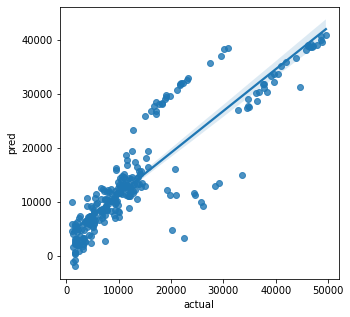

In [143]:
# 산점도 그리기

plt.figure(figsize=(5,5))
sns.regplot(x='actual' ,y='pred', data=comparison)    #regplot - 선도 같이 그려줌

plt.show()

### RMSE & R²(결정계수)
> 회귀 -> 연속형 변수를 예측할 때 쓰임 -> 값들의 나열 -> 예측값-실제값 사이의 차이 = 오차, 이 오차들을 기준으로 모델의 성능이 결정

|평가지표|설명|
|-|-|
|MAE (Mean Absolute Error, 평균 절대 오차)|- 실젯값과 예측값 사이의 오차에 절댓값을 씌운 뒤 이에 대한 평균을 계산<br>- 0에 가까울수록 좋음|
|MSE (Mean Squared Error, 평균 제곱 오차)|- 실젯값과 예측값 사이의 오차를  제곱한 뒤 이에 대한 평균을 계산<br>- 0에 가까울수록 좋음|
|RMSE (Root Mean Squared Error, 루트 평균 제곱 오차)<br>|- MSE에 루트를 씌운 값<br>- 0에 가까울수록 좋음<br>- 연속형 변수를 예측할 때 가장 일반적으로 사용되는 평가지표|
|R²|- 결정계수<br>- 독립변수가 종속변수를 얼마만큼 설명해 주는지 나타내는 지표, 즉 설명력<br>- 1에 가까울수록 좋음|

#mean_squared_error()

In [145]:
from sklearn.metrics import mean_squared_error  #평가관련 지표

In [146]:
# mse -> 실제값, 예측값
# MSE

mean_squared_error(y_test, pred)
# 모델 간 비교 (다른 알고리즘, 다른 독립변수 조합)

30685749.465737995

In [147]:
# rmse
mean_squared_error(y_test, pred)**0.5    #거듭제곱 연산으로 값 작게

5539.471948276117

In [149]:
# rmse #2
mean_squared_error(y_test, pred, squared=False)  #제곱 없이 가능

5539.471948276117

$R^2 = \frac{SSR}{SST}$<br>
* **SST** (Sum of Squares Total) : 총변동
* **SSR** (Sum of Squares Regression) : 설명 가능한 변동
* **SSE** : 설명이 안되는 변동
* 모델이 얼마나 값의 변동을 잘 설명하는가? = 예측을 잘하는가?
* https://m.blog.naver.com/pmw9440/221822183325

In [ ]:
# 학습시킨 독립변수, 종속변수
model.score(X_train, y_train)

# R²


0.7455515454595125

## 선형회귀 `Linear Regression`
* 독립변수와 종속변수 간에 선형 관계가 있음을 가정하여 최적의 선을 그려서 예측하는 방법
* 머신러닝에서는 손실(오차)함수 `Loss Function` 를 최소화하는 선을 찾아서 모델을 만들어냄
* 수식을 도출하기에 매우 쉽게 때문에 그 해석도 직관적
    * 회귀 직선의 수식에 관련된 값을 제공

In [152]:
# 독립변수별 계수 확인
import numpy as np

model.coef_ #각 독립변수가 y값에 얼ㅇ마나 영향을 수나요

array([  248.0747473 ,   341.05047148,   567.28152844, 23717.79639542,
        -155.82367665,  -159.17943468,  -640.6454047 ,  -951.25416336])

In [153]:
pd.Series(model.coef_, index=X.columns)

age                  248.07
bmi                  341.05
children             567.28
smoker             23717.80
sex_male            -155.82
region_northwest    -159.18
region_southeast    -640.65
region_southwest    -951.25
dtype: float64

In [154]:
model.intercept_  #절편값 - 모든 것이 0일 때의 값

-11764.909073858327

$261.94 × age + 339.54 × bmi + 607.58 × children + 23878.00 × smoker + 42.42× sex male + (-394.02) × region northwest + (-1073.15) × region southeast + (-973.02) × region southwest -12258.305052625143$

* 모델의 계수를 해석할 때 '부호'의 영향에 유의
* 부호와 상관없이 **계수의 절대값이 클수록 영향이 크다**라고 할 수 있고, 절대값이 0에 가까울 수록 영향력이 거의 없음
* 여러 계수를 서로 비교할 때, 단순히 절댓값이 더 크면 영향이 크다? -> 각 변수의 스케일(단위)
* 이 부분을 명료하게 (확실하게) 스케일링 작업

## 모델 배포
* 모델 -> pkl 확장자 -> 배포

In [155]:
!pip install mlxtend -q   #확장기능

In [156]:
import joblib # pkl 세이브파일을 만들어주는 라이브러리

joblib.dump(model, 'first_model.pkl')

['first_model.pkl']

In [157]:
from google.colab import files

files.download('first_model.pkl') # 다운로드

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [158]:
model_from_joblib = joblib.load('first_model.pkl')
model_from_joblib

LinearRegression()

In [159]:
pd.Series(model_from_joblib.coef_, index = X.columns)

age                  248.07
bmi                  341.05
children             567.28
smoker             23717.80
sex_male            -155.82
region_northwest    -159.18
region_southeast    -640.65
region_southwest    -951.25
dtype: float64